In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the libraries

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score

In [ ]:
#Applying styles to notebook

plt.style.use('fivethirtyeight')

**Read the dataset**


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


**Data** **Preparation**

In [ ]:
#Checking data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
#Checking null values
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [ ]:
#Creating new column
df['CGPA_']=['1-8' if x<=5 else "1-3" if x>5 and x<=6 else '7+' for x in df['CGPA']]
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,CGPA_
0,22,Male,Electronics And Communication,1,8,1,1,1,7+
1,21,Female,Computer Science,0,7,1,1,1,7+
2,22,Female,Information Technology,1,6,0,0,1,1-3
3,21,Male,Information Technology,0,8,0,1,1,7+
4,22,Male,Mechanical,0,8,1,0,1,7+


**Removing data**

In [ ]:
#Removing Hostel_column
df=df.drop(['Hostel'],axis=1)

In [ ]:
df=df.drop(['CGPA_'],axis=1)

In [ ]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1
1,21,Female,Computer Science,0,7,1,1
2,22,Female,Information Technology,1,6,0,1
3,21,Male,Information Technology,0,8,1,1
4,22,Male,Mechanical,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0
2962,23,Male,Mechanical,1,7,0,0
2963,22,Male,Information Technology,1,7,0,0
2964,22,Male,Computer Science,1,7,0,0


In [ ]:
#finding the shape of data
df.shape

(2966, 7)

**Handling missing values**

In [ ]:
#Finding null values
df.isnull().any()

Age                  False
Gender               False
Stream               False
Internships          False
CGPA                 False
HistoryOfBacklogs    False
PlacedOrNot          False
dtype: bool

In [ ]:
#Creating dummy dataframe for categorical values
df_cat=df.select_dtypes(include='int')
df_cat.head()

,Age,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,8,1,1
1,21,0,7,1,1
2,22,1,6,0,1
3,21,0,8,1,1
4,22,0,8,0,1


In [ ]:
#Descriptive analysis
df.describe(include='all') 

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966,2966,2966.000000,2966.000000,2966.000000,2966.000000
unique,NaN,2,6,NaN,NaN,NaN,NaN
top,NaN,Male,Computer Science,NaN,NaN,NaN,NaN
freq,NaN,2475,776,NaN,NaN,NaN,NaN
mean,21.485840,NaN,NaN,0.703641,7.073837,0.192178,0.552596
std,1.324933,NaN,NaN,0.740197,0.967748,0.394079,0.497310
min,19.000000,NaN,NaN,0.000000,5.000000,0.000000,0.000000
25%,21.000000,NaN,NaN,0.000000,6.000000,0.000000,0.000000
50%,21.000000,NaN,NaN,1.000000,7.000000,0.000000,1.000000
75%,22.000000,NaN,NaN,1.000000,8.000000,0.000000,1.000000


**Handling categorical values**

In [ ]:
df=df.replace(['Computer Science','Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'],
[0,1,2,3,4,5])

In [ ]:
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})

In [ ]:
df.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,2,1,8,1,1
1,21,0,0,0,7,1,1
2,22,0,1,1,6,0,1
3,21,1,1,0,8,1,1
4,22,1,3,0,8,0,1


In [ ]:
#Descriptive analysis
df.describe(include='all')

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.834457,1.932569,0.703641,7.073837,0.192178,0.552596
std,1.324933,0.371732,1.682618,0.740197,0.967748,0.394079,0.497310
min,19.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,21.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,21.000000,1.000000,2.000000,1.000000,7.000000,0.000000,1.000000
75%,22.000000,1.000000,3.000000,1.000000,8.000000,0.000000,1.000000
max,30.000000,1.000000,5.000000,3.000000,9.000000,1.000000,1.000000


In [ ]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,2,1,8,1,1
1,21,0,0,0,7,1,1
2,22,0,1,1,6,0,1
3,21,1,1,0,8,1,1
4,22,1,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,1,1,0,7,0,0
2962,23,1,3,1,7,0,0
2963,22,1,1,1,7,0,0
2964,22,1,0,1,7,0,0


In [ ]:
#Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   HistoryOfBacklogs  2966 non-null   int64
 6   PlacedOrNot        2966 non-null   int64
dtypes: int64(7)
memory usage: 162.3 KB


In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
df.isnull().any()

Age                  False
Gender               False
Stream               False
Internships          False
CGPA                 False
HistoryOfBacklogs    False
PlacedOrNot          False
dtype: bool

<Axes: >

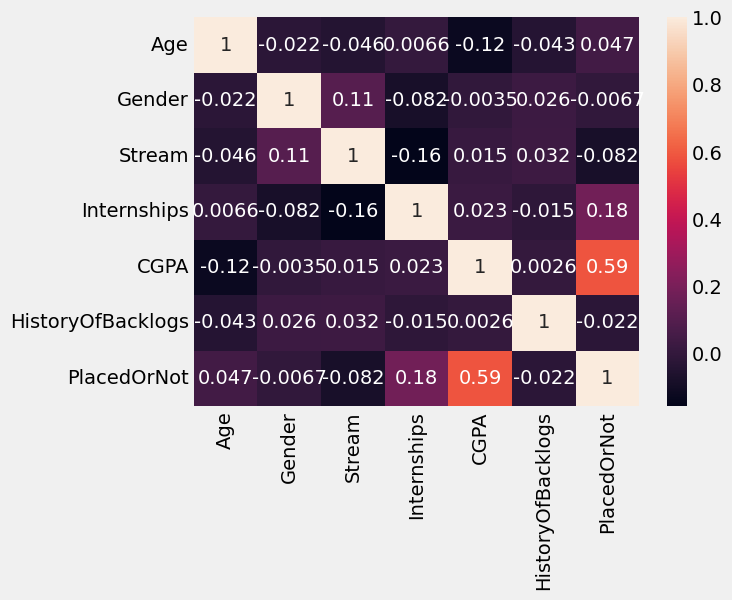

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='CGPA', ylabel='Density'>

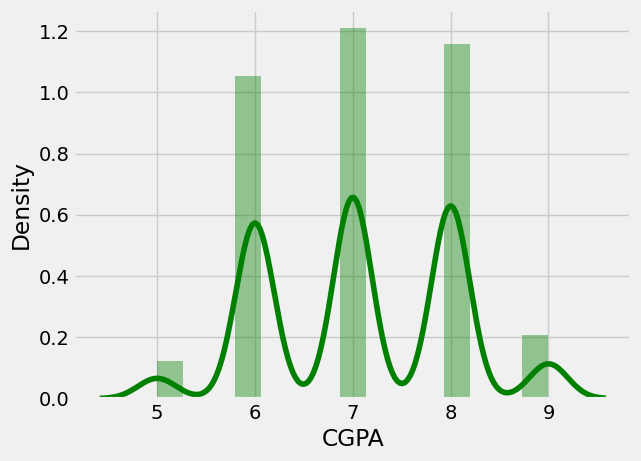

In [ ]:
#Check data distribution

sns.distplot(df['CGPA'],color='green')

**Handling outliers**

<Axes: >

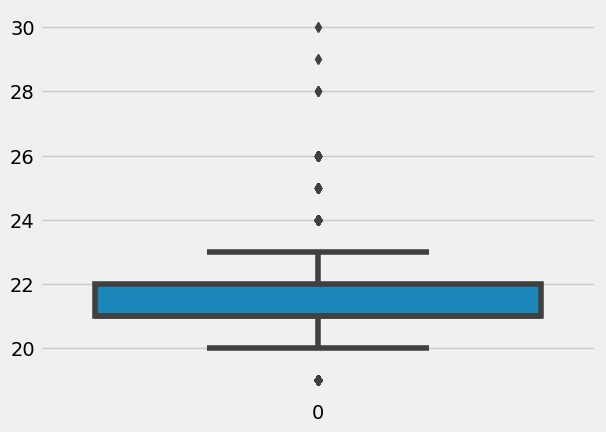

In [ ]:
sns.boxplot(df['Age'])

**Outliers counting**

In [ ]:
#Finding the count of outliers
#IQR =q3=q1       upperbound=q3+(1.5*IQR), lower bound=q1=(1.5*IQR)
q1=np.quantile(df['Age'],0.25)
q3=np.quantile(df['Age'],0.75)
print('Q1 = {}'.format(q1))
print('Q3 = {}'.format(q3))
IQR=q3-q1
print('IQR value is{}'.format(IQR))
upperBound=q3+(1.5*IQR)
lowerBound=q1-(1.5*IQR)
print('the upper bound value is {} & the lower bound value is {}'.format(upperBound,lowerBound))

Q1 = 21.0
Q3 = 22.0
IQR value is1.0
the upper bound value is 23.5 & the lower bound value is 19.5


In [ ]:
#skwed data
print ('skwed data:',len(df[df['Age']>upperBound]))

skwed data: 215


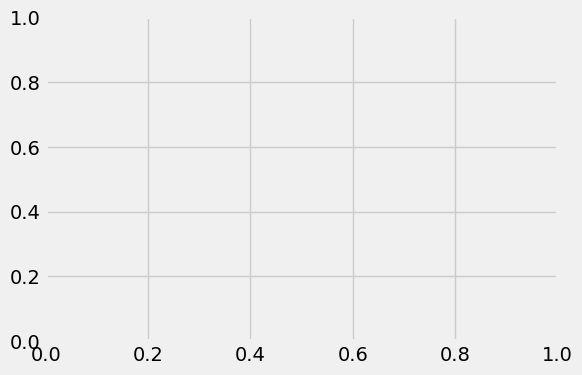

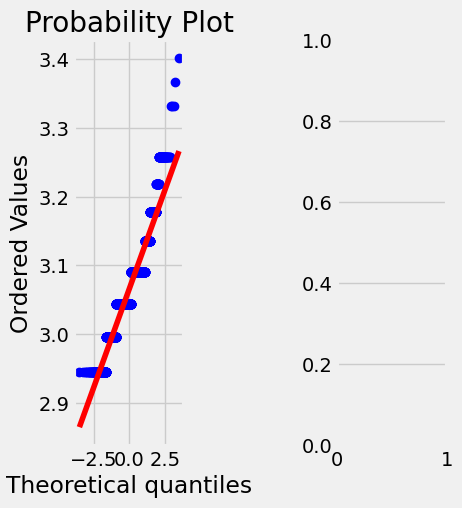

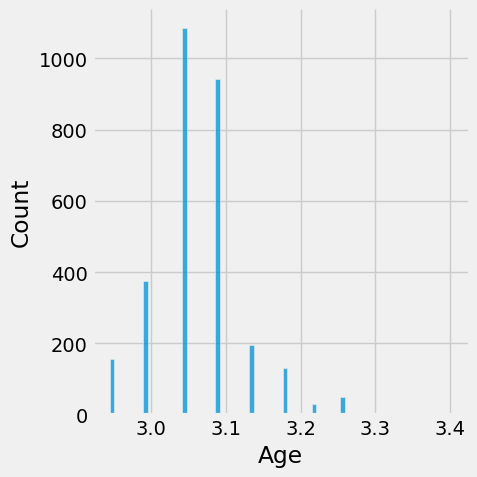

In [ ]:
#Handling outline

from scipy import stats
plt.figure(figsize=(20,4))
plt.subplot(1,3,2)
sns.displot(df['Age'])
plt.subplot(1,3,1)
stats.probplot(np.log(df['Age']),plot=plt)
plt.subplot(1,3,3)
sns.displot(np.log(df['Age']))

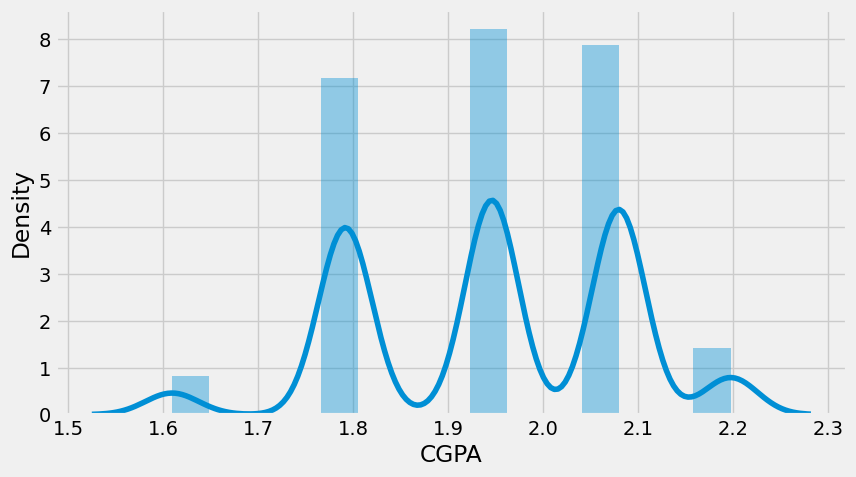

In [ ]:
def transformationplot(feature):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
transformationplot(np.log(df['CGPA']))

Visual Analysis

In [ ]:
#Task 3
#exploratory data Analysis

<Axes: xlabel='PlacedOrNot', ylabel='Density'>

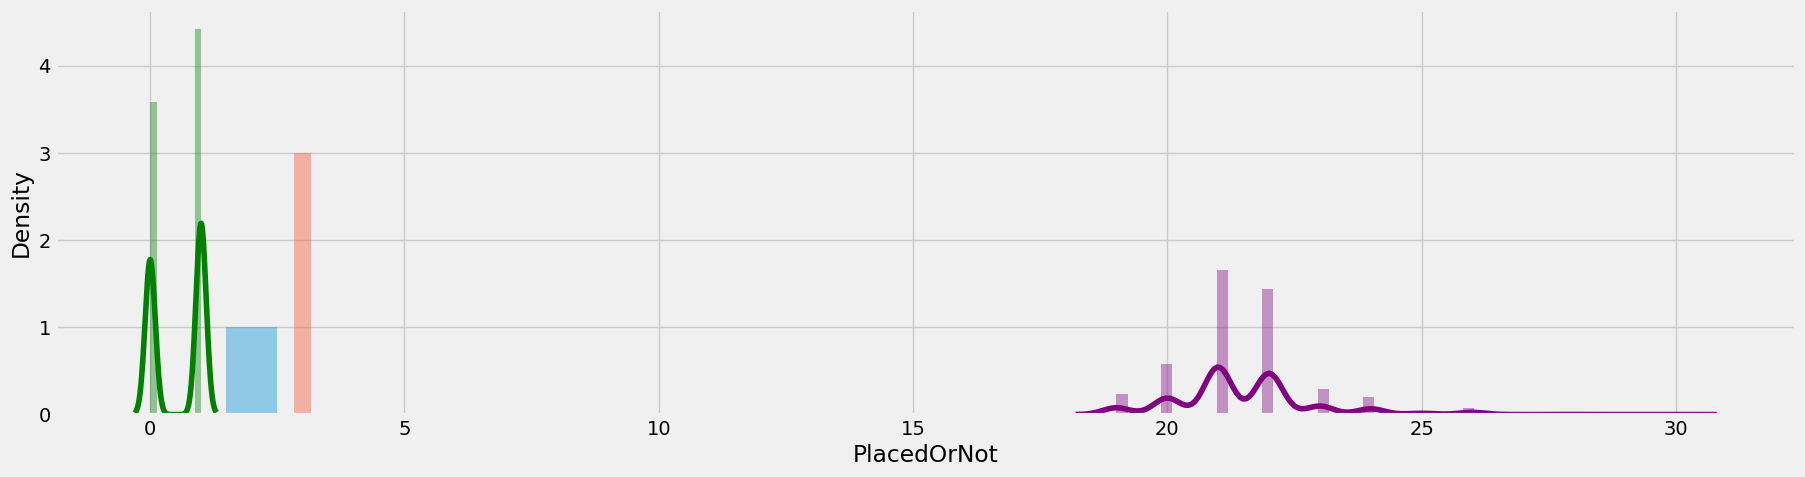

In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(2,1,2)
sns.distplot(df['Age'],color='purple')
sns.distplot(3,3,2)
sns.distplot(df['PlacedOrNot'],color='green')

In [ ]:
#visual analysis

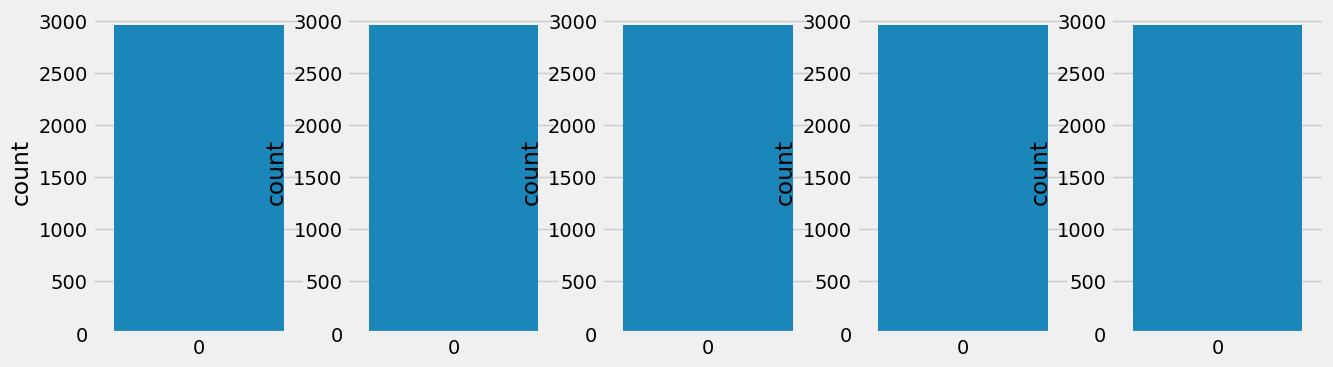

In [ ]:
plt.figure(figsize=(20,4))
for i,j in enumerate(df_cat):
  plt.subplot(1,7,i+1)
  sns.countplot(df[j])

Univariate Analysis

<Axes: xlabel='Age', ylabel='Count'>

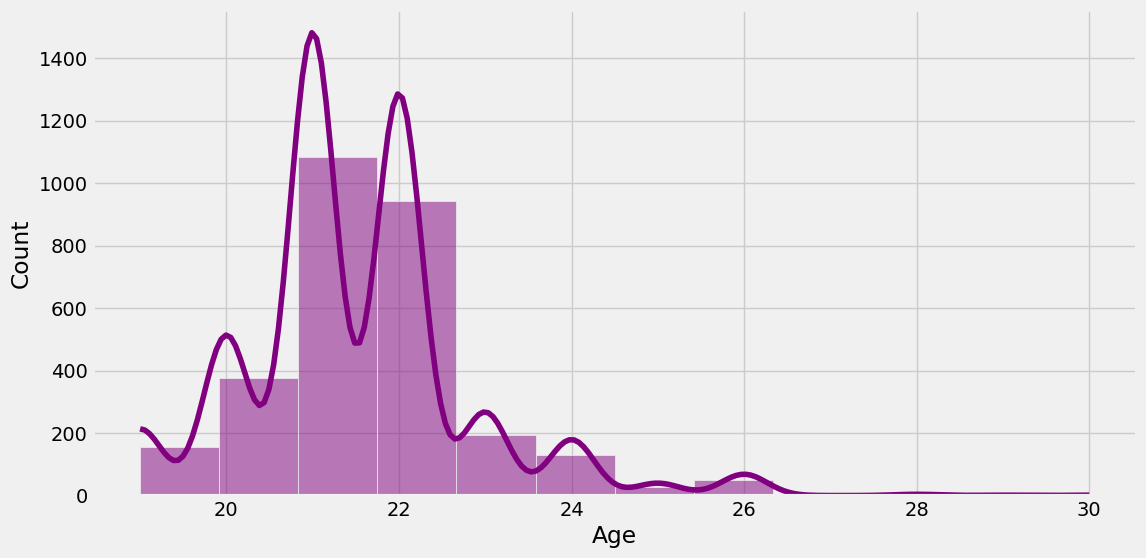

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Age',color='purple',kde=True,bins=12,legend=True)

<Axes: xlabel='CGPA', ylabel='Density'>

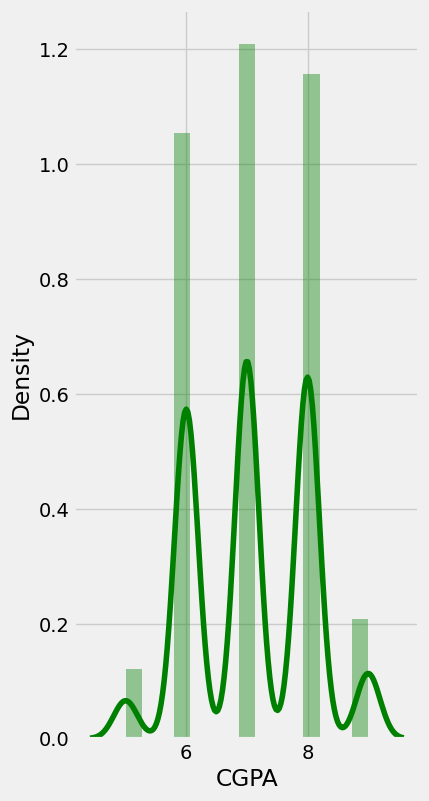

In [ ]:
#univariate anaiysis
plt.figure(figsize=(23,9))
plt.subplot(1,5,2)
sns.distplot(df['CGPA'],color='Green')

<Axes: xlabel='PlacedOrNot', ylabel='Density'>

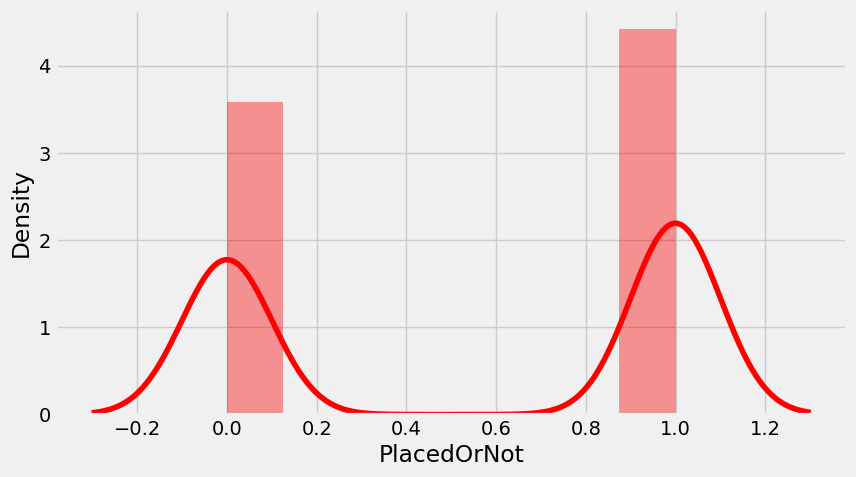

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='r')

Bivariate Analysis

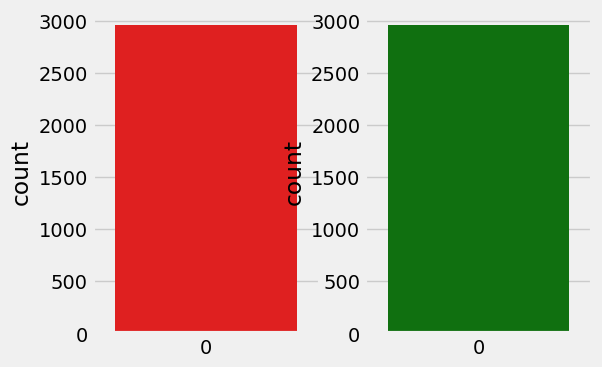

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
sns.countplot(df['Gender'],color='r')
plt.subplot(1,4,2)
sns.countplot(df['Age'],color='g')
plt.show()

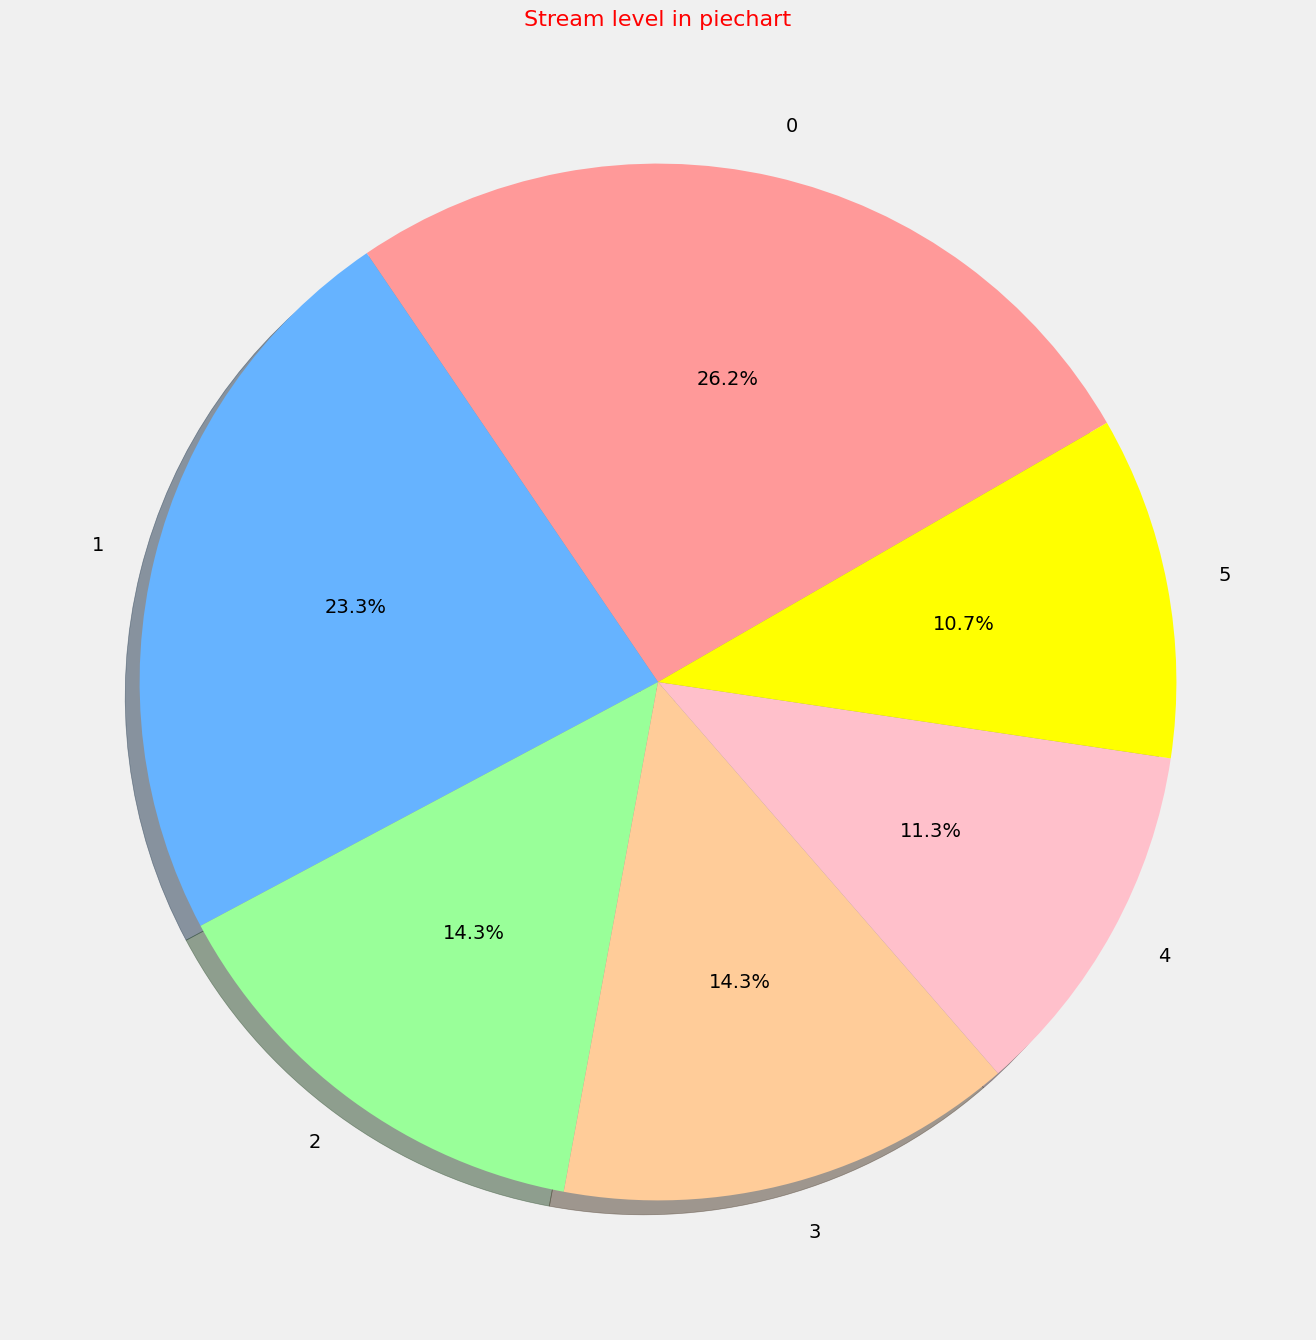

In [ ]:
labels=df["Stream"].value_counts().index
sizes=df["Stream"].value_counts()
colors=['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize=(16,16))
plt.pie(sizes,labels=labels,rotatelabels=False,autopct='%1.1f%%',colors=colors,shadow=True,startangle=30)
plt.title("Stream level in piechart",color='r',fontsize=16)
plt.show()

<Axes: xlabel='count', ylabel='Internships'>

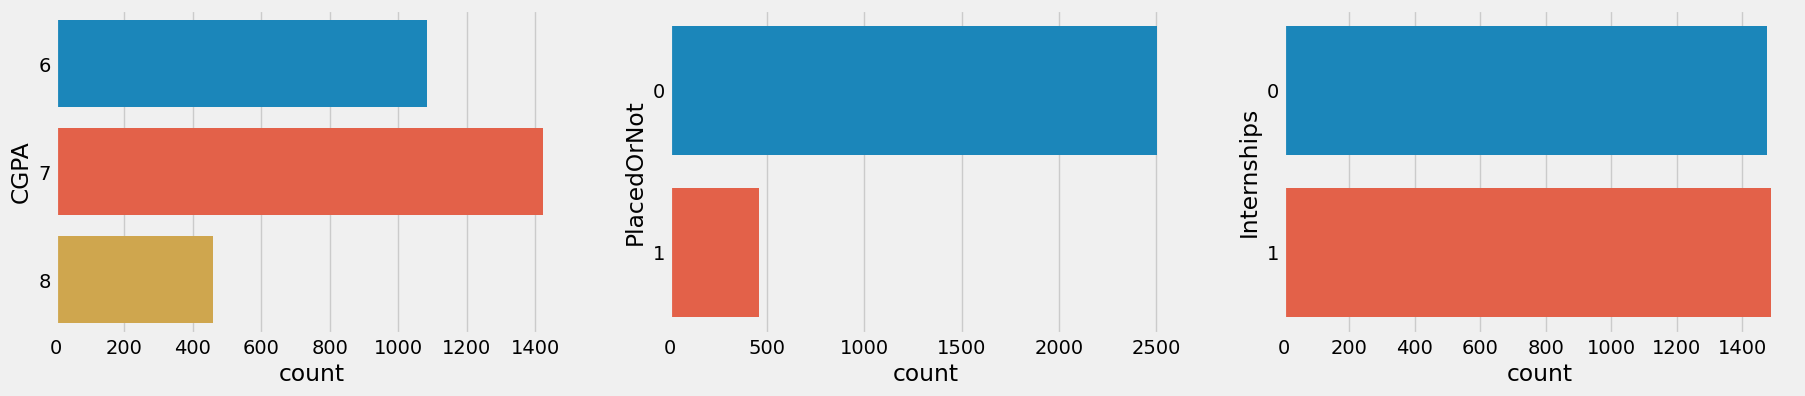

In [ ]:
#multivariate analysis

plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(df['CGPA'],y=df['Age'])
plt.subplot(132)
sns.countplot(df['PlacedOrNot'],y=df['Age'])
plt.subplot(133)
sns.countplot(df['Internships'],y=df['Age'])

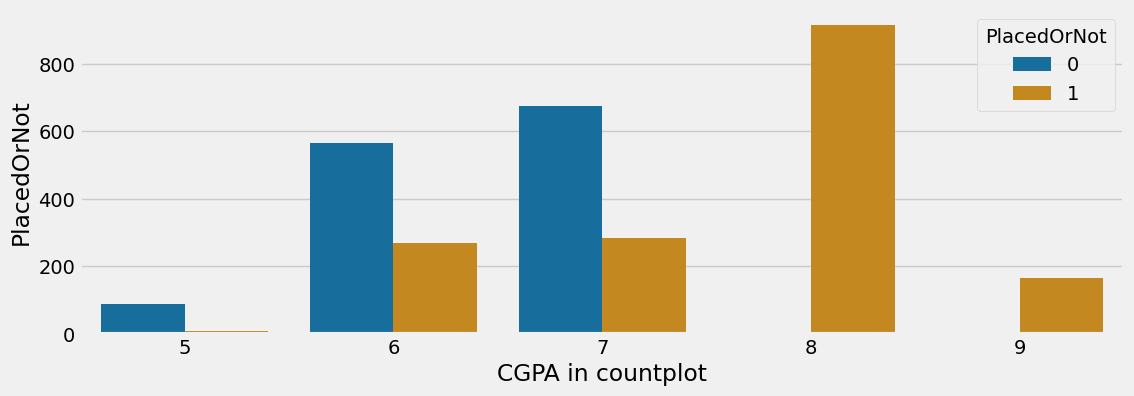

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x=df["CGPA"],hue=df["PlacedOrNot"], palette="colorblind")
plt.xlabel("CGPA in countplot")
plt.ylabel("PlacedOrNot")
plt.show()

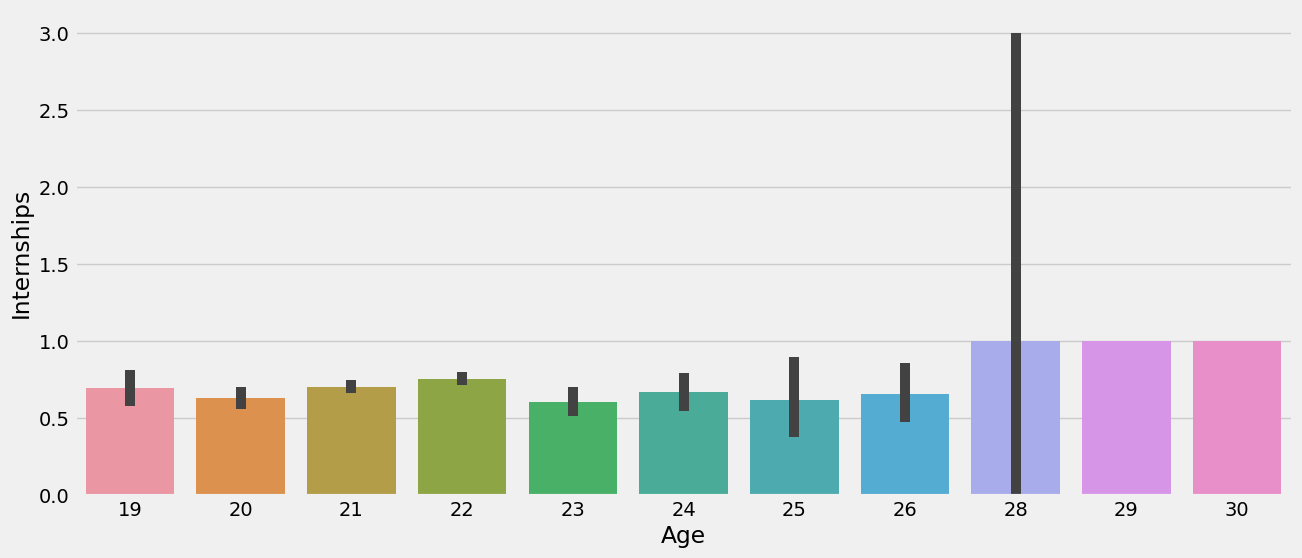

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(data=df,x='Age',y='Internships')
plt.show()

<Axes: xlabel='Age', ylabel='CGPA'>

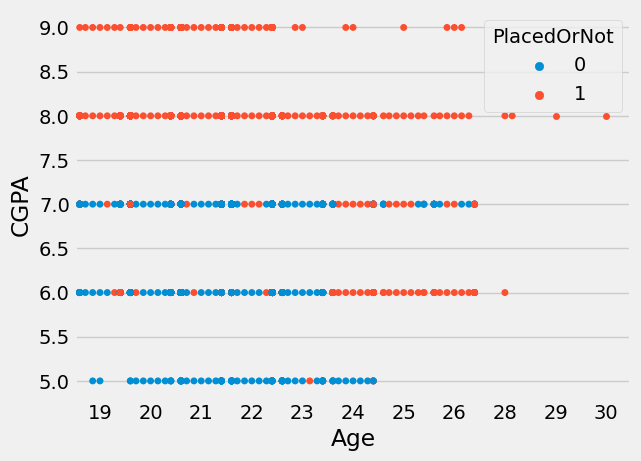

In [ ]:

sns.swarmplot(x=df['Age'],y=df['CGPA'],hue=df['PlacedOrNot'])

In [ ]:
#column define

In [ ]:
data=df.drop('PlacedOrNot',axis=1)
column=[column for column in data.columns if  df[column].dtype!='PlacedOrNot']
column

['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'HistoryOfBacklogs']

In [ ]:
x=df.drop('PlacedOrNot',axis=1)

x

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,1,2,1,8,1
1,21,0,0,0,7,1
2,22,0,1,1,6,0
3,21,1,1,0,8,1
4,22,1,3,0,8,0
...,...,...,...,...,...,...
2961,23,1,1,0,7,0
2962,23,1,3,1,7,0
2963,22,1,1,1,7,0
2964,22,1,0,1,7,0


In [ ]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,2,1,8,1,1
1,21,0,0,0,7,1,1
2,22,0,1,1,6,0,1
3,21,1,1,0,8,1,1
4,22,1,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,1,1,0,7,0,0
2962,23,1,3,1,7,0,0
2963,22,1,1,1,7,0,0
2964,22,1,0,1,7,0,0


In [ ]:
#Splitting the data into train and test
y=df['PlacedOrNot']
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [ ]:

#scaling data
names=data[column]
sc=StandardScaler()
x_bal=sc.fit_transform(x)
x_bal=pd.DataFrame(x_bal,columns=data.columns)

In [ ]:
#independent variables
x=df.iloc[:,0:6]
x.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,1,2,1,8,1
1,21,0,0,0,7,1
2,22,0,1,1,6,0
3,21,1,1,0,8,1
4,22,1,3,0,8,0


In [ ]:
#dependent   variables
y=df.iloc[:,6:]
y.head()

,PlacedOrNot
0,1
1,1
2,1
3,1
4,1


In [ ]:
#split& train test data
from   sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(2372, 6)
(594, 6)


In [ ]:
#model building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
model_accuracy={}
cv=KFold(n_splits=15,random_state=13,shuffle=True)

SVM model

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier =  svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)
SVC(kernel='linear')
x_train_prediction = classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('Accuracy score of the training data:',training_data_accuracy)

Accuracy score of the training data: 0.7824620573355818


Knn model

In [ ]:
best_k = {"Regular":0}
best_score ={"Regular":0}
for k in range (3,50,2):
  ##using Regular training set
  knn_temp = KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(x_train,y_train)
  knn_temp_pred = knn_temp.predict(x_test)
  score = metrics.accuracy_score(y_test,knn_temp_pred)*100
  if  score>=best_score["Regular"] and score < 100:
      best_score["Regular"] = score
      best_k["Regular"]=k
print("----Results-\nk:  {}nScore:{}".format(best_k,best_score))
knn= KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
testd = accuracy_score(knn_pred,y_test)

----Results-
k:  {'Regular': 13}nScore:{'Regular': 88.21548821548821}


Artificial neural network model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow .keras import layers

In [ ]:
classifier=Sequential()
#add input layer and first hidden layer
classifier.add(keras.layers.Dense(6,activation='relu',input_dim=6))
classifier.add(keras.layers.Dropout(0.50))
#add 2nd hidden layer
classifier.add(keras.layers.Dense(6,activation='relu'))
classifier.add(keras.layers.Dropout(0.50))
#final or output layer
classifier.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
#compiling the model
loss_1=tf.keras.losses.BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss_1,metrics=['accuracy'])

In [ ]:
#fitting the model
classifier.fit (x_train,y_train,batch_size=20,epochs=100)

Epoch 1/100
119/119 [==============================] - 2s 2ms/step - loss: 1.2124 - accuracy: 0.5249
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7916 - accuracy: 0.5451
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7426 - accuracy: 0.5261
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7072 - accuracy: 0.5422
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.5379
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5413
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5451
Epoch 8/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5481
Epoch 9/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5578
Epoch 10/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6855 - accura

In [ ]:
logr=LogisticRegression(solver ='liblinear')
logr.fit(x_train,y_train)
logr_score=logr.score(x_test,y_test)
model_accuracy['Logistic Regression']=logr_score*100
logr_score*100

71.54882154882155

In [ ]:
kn_model=KNeighborsClassifier(n_neighbors=15)
kn_model.fit(x_train,y_train)
kn_score=kn_model.score(x_test,y_test)
model_accuracy['Knn']=kn_score*100
kn_score*100

86.36363636363636

In [ ]:
ran_model=RandomForestClassifier(n_estimators=40)
ran_model.fit(x_train,y_train)
ran_score=ran_model.score(x_test,y_test)
model_accuracy['RanForest']=ran_score*100
ran_score*100

88.55218855218855

In [ ]:
ada_model = AdaBoostClassifier()
ada_model.fit(x_train,y_train)
ada_score=ada_model.score(x_test,y_test)
model_accuracy['AdaBoost']=ada_score*100
ada_score*100

87.54208754208754

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_grid={
    'n_estimators':[100,120,150,180,200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20]

    }

In [ ]:
rf=RandomForestClassifier()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)
rf_random.fit(x_train,y_train)
#best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': 10}

In [ ]:

from flask import Flask, render_template, request 
import pickle

In [ ]:
pickle.dump(knn,open("placement.pk1","wb"))

In [ ]:
model=pickle.load(open('placement.pk1','rb'))